### Analyzing the credit card magnetric stripe usage in preventing fraudulent transations

In [2]:
%matplotlib widget

# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load in csv and replace column integers
card_df = pd.read_csv("main\Resources\cleaned_card_data.csv")
card_df['Used Chip'].replace(1, 'Chip', inplace=True)
card_df['Used Chip'].replace(0, 'No Chip', inplace=True)
card_df['Fraud'].replace(1, 'Fraud', inplace=True)
card_df['Fraud'].replace(0, 'Not Fraud', inplace=True)
card_df['Used Pin Number'].replace(1, 'Pin', inplace=True)
card_df['Used Pin Number'].replace(0, 'No Pin', inplace=True)
card_df.head()

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
0,57.88,0.31,1.95,1,Chip,No Pin,0,Not Fraud
1,10.83,0.18,1.29,1,No Chip,No Pin,0,Not Fraud
2,5.09,0.81,0.43,1,No Chip,No Pin,1,Not Fraud
3,2.25,5.60,0.36,1,Chip,No Pin,1,Not Fraud
4,44.19,0.57,2.22,1,Chip,No Pin,1,Not Fraud


In [4]:
# Create Used Pin Number dataframe
no_measure_df = card_df[["Fraud","Used Chip","Used Pin Number"]]
no_measure_df.head()

,Fraud,Used Chip,Used Pin Number
0,Not Fraud,Chip,No Pin
1,Not Fraud,No Chip,No Pin
2,Not Fraud,No Chip,No Pin
3,Not Fraud,Chip,No Pin
4,Not Fraud,Chip,No Pin


In [5]:
fraud_df = no_measure_df.loc[(no_measure_df['Used Pin Number'] == "No Pin") & (no_measure_df['Used Chip'] == "No Chip"), :]
fraud_df.head()

,Fraud,Used Chip,Used Pin Number
1,Not Fraud,No Chip,No Pin
2,Not Fraud,No Chip,No Pin
5,Not Fraud,No Chip,No Pin
6,Not Fraud,No Chip,No Pin
8,Not Fraud,No Chip,No Pin


In [6]:
grouped_fraud_df = fraud_df.groupby(['Fraud']).value_counts()
grouped_fraud_df.head()

Fraud      Used Chip  Used Pin Number
Fraud      No Chip    No Pin              64729
Not Fraud  No Chip    No Pin             519317
Name: count, dtype: int64

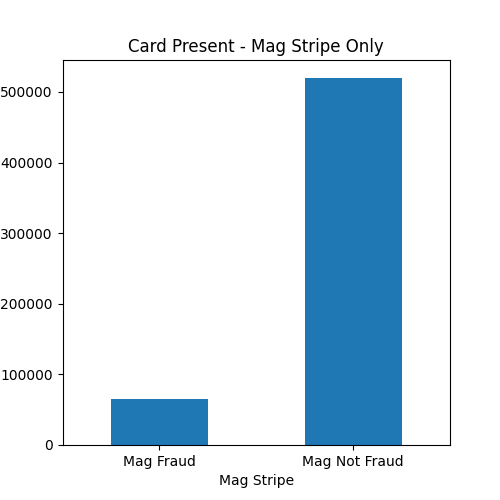

In [7]:
pin_use_plot = grouped_fraud_df.plot(kind="bar", figsize=(5,5))
plt.title("Card Present - Mag Stripe Only")
plt.ylabel("Transactions")
plt.gca().set_xticklabels(['Mag Fraud', 'Mag Not Fraud'])
plt.xticks(rotation=0)
plt.xlabel("Mag Stripe", rotation=0)
plt.show()
plt.tight_layout()